# STC 720 Assignment 1 Jupyter Notebook

In [162]:
import semopy
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import statsmodels.api as sm
import factor_analyzer
from sklearn.ensemble import IsolationForest
from factor_analyzer import FactorAnalyzer 
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import plotly.express as px
from sklearn.datasets import make_blobs
from numpy import quantile, random, where
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import statsmodels.api as sm
import statsmodels.genmod.families.links as links

import statsmodels
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

# Question 2A EDA

In [163]:
#Import and view the data
df2A = pd.read_excel("/Users/paul_reitz/Data/STC710/Question 2A.xlsx")
df2A.head()


,ID,x,y
0,1,32.669211,52.587129
1,2,52.354746,-31.460716
2,3,3.506747,23.112899
3,4,21.042115,50.217991
4,5,31.959012,49.423824


In [164]:
#Count null values
df2A.isnull().sum()

ID    0
x     0
y     0
dtype: int64

In [165]:
#information on data
df2A.info()
#describe distribution of x
df2A.x.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      450 non-null    int64  
 1   x       450 non-null    float64
 2   y       450 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 10.7 KB


count    450.000000
mean      92.491250
std       86.523897
min     -189.632622
25%       23.265532
50%       84.573328
75%      159.202366
max      395.894113
Name: x, dtype: float64

Skewness: 0.4826292811654563
Kurtosis: 0.9338225700804115


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



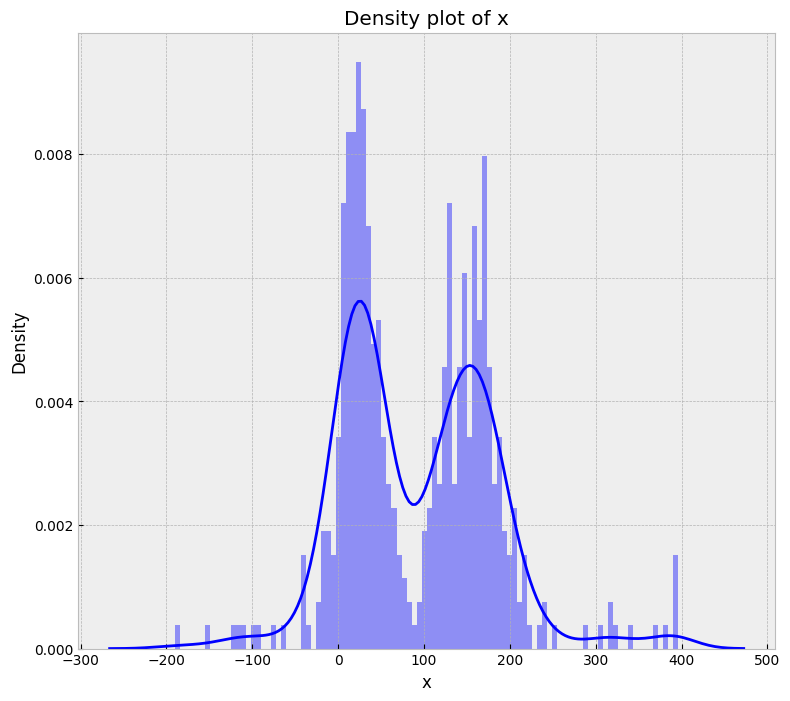

In [166]:
#plot x variable density and shape parameters
plt.figure(figsize=(9, 8))
plt.title("Density plot of x")
sns.distplot(df2A.x, color='b', bins=100, hist_kws={'alpha': 0.4})

#Determine skewness and kurtosis
print(f"Skewness: {df2A['x'].skew()}")
print(f"Kurtosis: {df2A['x'].kurt()}")

In [167]:
#describe distribution of x
df2A.y.describe()

count    450.000000
mean      80.933165
std       79.832121
min     -129.689793
25%        8.325313
50%       99.185675
75%      150.407412
max      298.963511
Name: y, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Skewness: -0.13836473411856656
Kurtosis: -1.0653588924007613


Text(0.5, 1.0, 'Density plot of x')

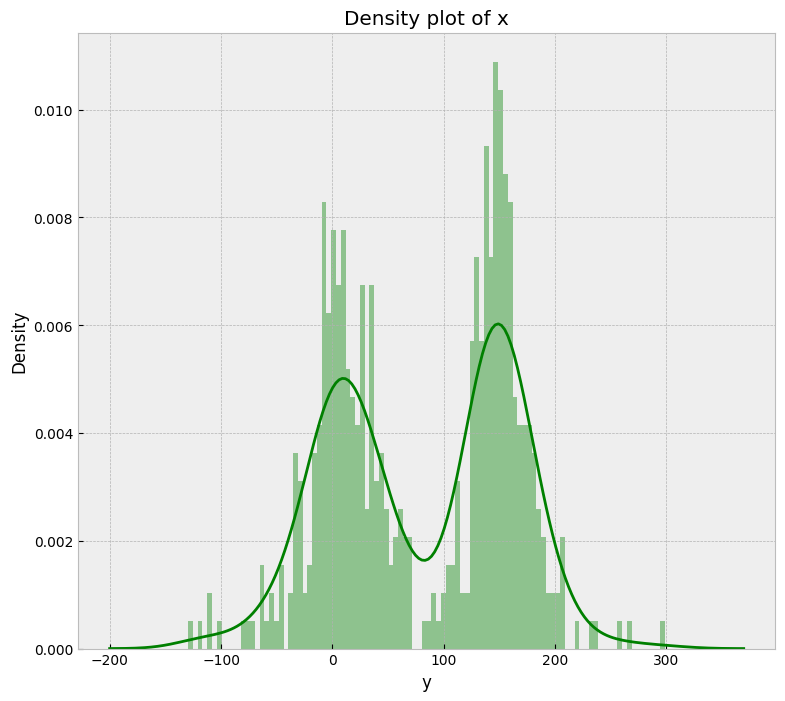

In [168]:
#plot y variable density and shape parameters

plt.figure(figsize=(9, 8))
sns.distplot(df2A.y, color='g', bins=100, hist_kws={'alpha': 0.4})

print(f"Skewness: {df2A['y'].skew()}")
print(f"Kurtosis: {df2A['y'].kurt()}")

plt.title("Density plot of x")

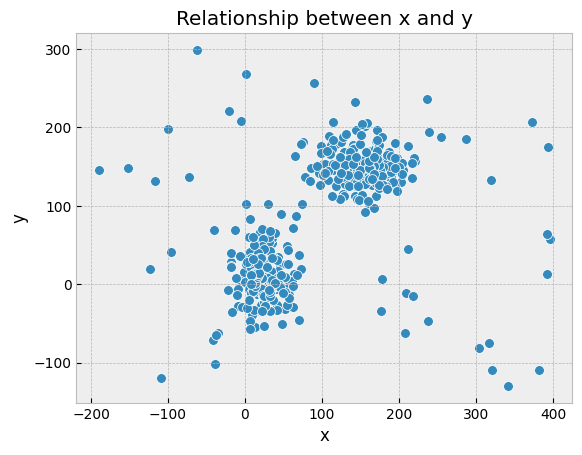

In [169]:
#Plot x against y
sns.scatterplot(x="x", y="y",data=df2A, palette="Dark2", s=50)
plt.title("Relationship between x and y")
plt.show()


In [170]:
#select the two variables into a new dataframe
df=df2A[['x', 'y']]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:1210: UserWarning:

The following kwargs were not used by contour: 'title'



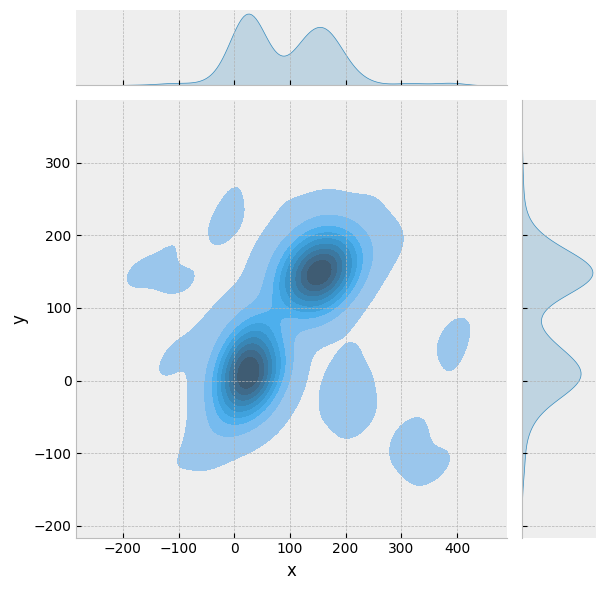

In [171]:
#Joint density plot of data to see distributional characteristics
sns.jointplot(data=df2A, x="x", y="y",kind='kde',fill=True, title='Joint density plot of x and y')

<AxesSubplot:>

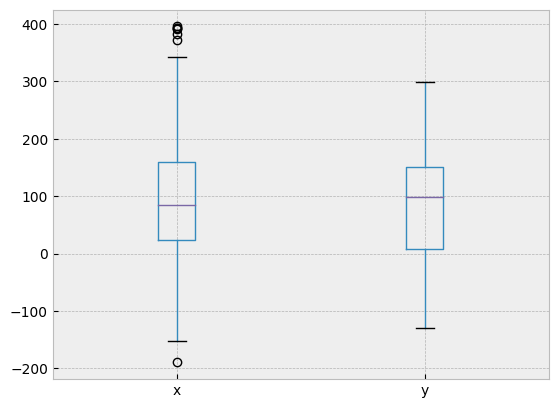

In [172]:
#Boxplot for outiers
df2A[['x','y']].boxplot()

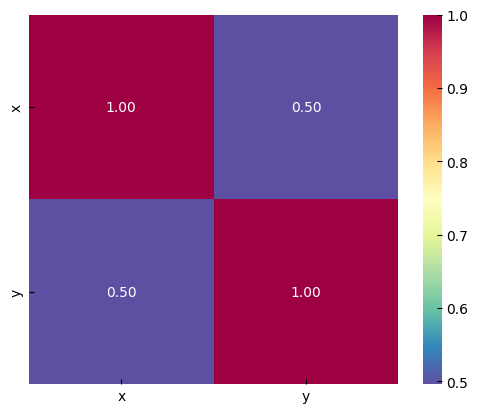

In [173]:
#Correlation matrix between x and y

corrmat = df.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=df.columns, 
                 xticklabels=df.columns, 
                 cmap="Spectral_r")
plt.show()

# Isolation Forest

In [174]:
#build and fit isolation forest model
model=IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.1),max_features=1.0)
model.fit(df2A[['x','y']])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



IsolationForest(contamination=0.1)

In [175]:
#determine anomaly scores and predicted anomalies
df['scores']=model.decision_function(df[['x','y']])
df['anomaly']=model.predict(df[['x','y']])
df.head(20)

pred=df['anomaly']
outliers=df.loc[df['anomaly']==-1]
outlier_index=list(outliers.index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(df['anomaly'].value_counts())

 1    405
-1     45
Name: anomaly, dtype: int64


In [176]:
df['anomaly_label']=pred
df['anomaly']=df['anomaly_label'].apply(lambda x: 'outlier' if x==-1  else 'inlier')
#plot anomalies in anomaly score
fig=px.histogram(df,x='scores',color='anomaly', title='Plot anomalies according to anomaly score')

fig.update_layout(
    autosize=False,
    width=700,
    height=500,)
fig.show()



In [177]:
#scatter plot x y with anomalies identified
fig = px.scatter(df,x='x',
                       y='y',color='anomaly', title='Plot of x vs y with anomalies identified')

fig.update_layout(
    autosize=False,
    width=700,
    height=500,)
fig.show()

## IQR anomally

In [178]:
#IQR anommaly confidence interval
def iqr_bounds(scores,k=1.5):
    q1 = scores.quantile(0.25)
    q3 = scores.quantile(0.75)
    iqr = q3 - q1
    lower_bound=(q1 - k * iqr)
    upper_bound=(q3 + k * iqr)
    print("Lower bound:{} \nUpper bound:{}".format(lower_bound,upper_bound))
    return lower_bound,upper_bound
    
#get confodence interval bounds, if outside of it then annomally
lower_bound,upper_bound=iqr_bounds(df['scores'],k=2)

Lower bound:-0.033253309203459855 
Upper bound:0.2212818848027256


# Part B

In [179]:
# import and observe data
df2B = pd.read_excel("/Users/paul_reitz/Data/STC710/Question 2B.xlsx")
df2B.head()

,Characteristic1,Characteristic2,Characteristic3,Characteristic4,Characteristic5,Characteristic6,Characteristic7,Characteristic8,Characteristic9,Outlier Indicator
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [180]:
#selecting variables to put into model
df2B_use=df2B.iloc[:,0:9]
df2B.head()

,Characteristic1,Characteristic2,Characteristic3,Characteristic4,Characteristic5,Characteristic6,Characteristic7,Characteristic8,Characteristic9,Outlier Indicator
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [181]:
# info on variables
df2B_use.describe()

,Characteristic1,Characteristic2,Characteristic3,Characteristic4,Characteristic5,Characteristic6,Characteristic7,Characteristic8,Characteristic9
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [182]:
# look for null values
df2B_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Characteristic1  683 non-null    int64
 1   Characteristic2  683 non-null    int64
 2   Characteristic3  683 non-null    int64
 3   Characteristic4  683 non-null    int64
 4   Characteristic5  683 non-null    int64
 5   Characteristic6  683 non-null    int64
 6   Characteristic7  683 non-null    int64
 7   Characteristic8  683 non-null    int64
 8   Characteristic9  683 non-null    int64
dtypes: int64(9)
memory usage: 48.1 KB


Text(0.5, 1.0, 'Boxplot of 9 cancer characteristic variables')

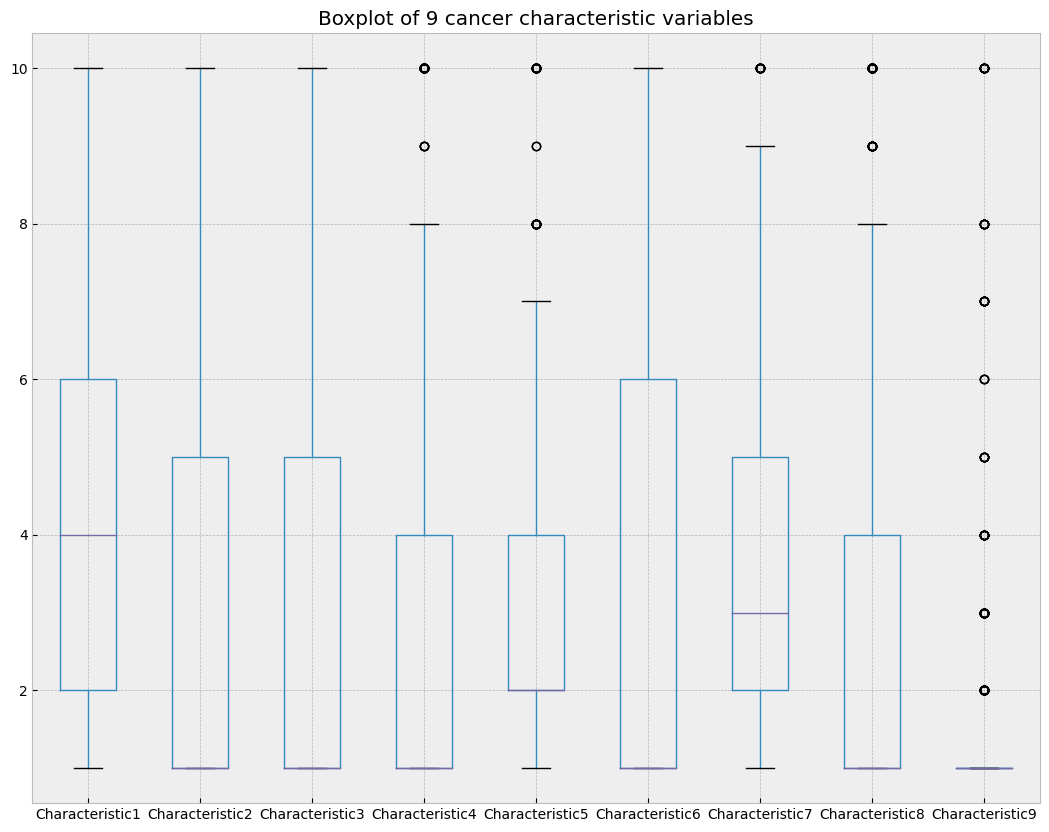

In [183]:
#boxplot code


df2B_use.boxplot(figsize=(13, 10))
plt.title('Boxplot of 9 cancer characteristic variables')

In [184]:
#determine contamination value
print(df2B['Outlier Indicator'].value_counts())

contamination=239/(444+239)
print(contamination)

0    444
1    239
Name: Outlier Indicator, dtype: int64
0.34992679355783307


array([[<AxesSubplot:title={'center':'Characteristic1'}>,
        <AxesSubplot:title={'center':'Characteristic2'}>,
        <AxesSubplot:title={'center':'Characteristic3'}>],
       [<AxesSubplot:title={'center':'Characteristic4'}>,
        <AxesSubplot:title={'center':'Characteristic5'}>,
        <AxesSubplot:title={'center':'Characteristic6'}>],
       [<AxesSubplot:title={'center':'Characteristic7'}>,
        <AxesSubplot:title={'center':'Characteristic8'}>,
        <AxesSubplot:title={'center':'Characteristic9'}>]], dtype=object)

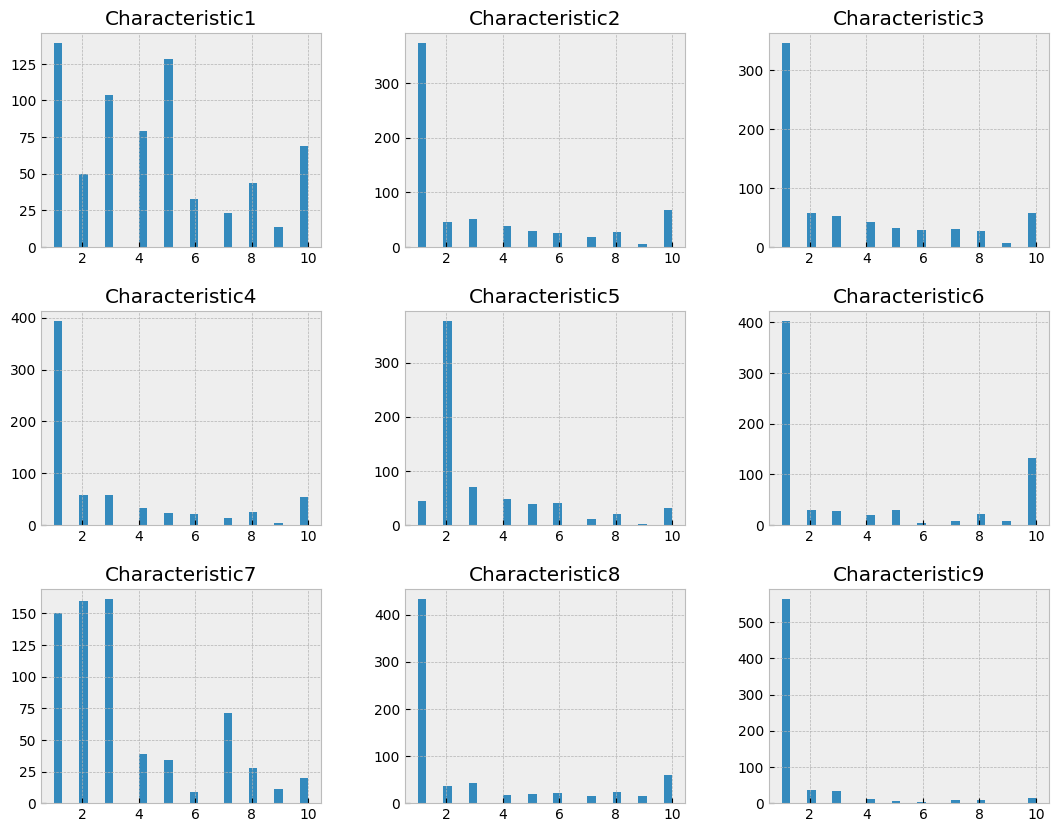

In [185]:
# variable histograms
df2B_use.hist(bins=30, figsize=(13, 10))

In [186]:
#Count null values
# df2B.isnull().sum()
df2B.isna().sum()

Characteristic1      0
Characteristic2      0
Characteristic3      0
Characteristic4      0
Characteristic5      0
Characteristic6      0
Characteristic7      0
Characteristic8      0
Characteristic9      0
Outlier Indicator    0
dtype: int64

<AxesSubplot:>

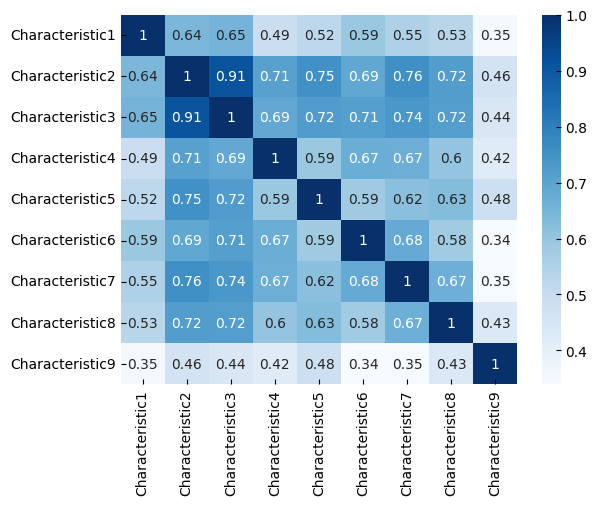

In [187]:
# variable correlation matrix
cor = df2B_use.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)

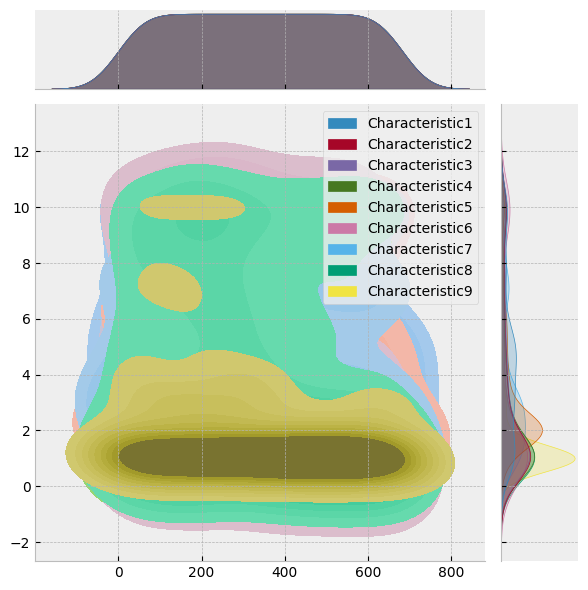

In [188]:
#joint density plot

df2_use=df2B.iloc[:,0:9]
sns.jointplot(data=df2_use,kind='kde',fill=True)

In [189]:
# get rid of na values
df2B_use = df2B_use.dropna(axis = 0, how = 'all')

In [190]:
df2B_use=df2B.iloc[:,0:9]
df2B_use.head()


,Characteristic1,Characteristic2,Characteristic3,Characteristic4,Characteristic5,Characteristic6,Characteristic7,Characteristic8,Characteristic9
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [191]:
%time

# fit isolation forest
df2B_use=df2B.iloc[:,0:9]
model=IsolationForest(contamination=contamination,n_estimators=1000)

model.fit(df2B_use)

cancer=pd.Series(model.decision_function(df2B_use))
predictions=pd.Series(model.predict(df2B_use))
df2B_use['iforest']= predictions
df2B_use['Possible cancer']=cancer

df2B_use['iforest']= df2B_use['iforest'].map({1:0,-1:1})

print(df2B_use['iforest'].value_counts())




CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 3.1 µs


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



0    444
1    239
Name: iforest, dtype: int64


In [192]:
df2B_use.head()

,Characteristic1,Characteristic2,Characteristic3,Characteristic4,Characteristic5,Characteristic6,Characteristic7,Characteristic8,Characteristic9,iforest,Possible cancer
0,5,1,1,1,2,1,3,1,1,0,0.163995
1,5,4,4,5,7,10,3,2,1,1,-0.011202
2,3,1,1,1,2,2,3,1,1,0,0.145230
3,6,8,8,1,3,4,3,7,1,1,-0.044684
4,4,1,1,3,2,1,3,1,1,0,0.122391


In [193]:
accuracy=239/(444+239)
print(accuracy)

0.34992679355783307


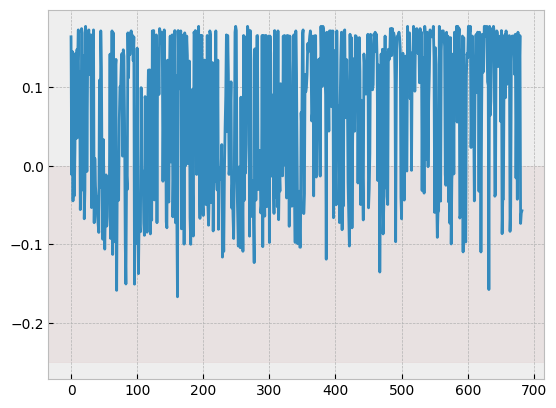

In [194]:

#anommaly histogram

plt.plot(cancer)
plt.axhspan(0,-0.25,alpha=0.05,color='darkred')


df2B_use['anomaly_label']=predictions
df2B_use['anomaly_label']=df2B_use['anomaly_label'].apply(lambda x: 'outlier' if x==1  else 'inlier')
#plot anomalies in anomaly score
fig=px.histogram(df2B_use,x='Possible cancer',color='anomaly_label', title='Plot anomalies according to anomaly score')

fig.update_layout(
    autosize=False,
    width=700,
    height=500,)
fig.show()


## K-fold cross-validation 

In [195]:


 
# df = df2B.iloc[:,0:9]
# X = df.iloc[:,:-1]
# y = df.iloc[:,-1]
 
# k = 5
# kf = KFold(n_splits=k, random_state=None)
 
# result = cross_val_score(predictions , X, y, cv = kf)
 
# print("Avg accuracy: {}".format(result.mean()))

# Question 3

In [196]:
df_orig = pd.read_excel("/Users/paul_reitz/Data/STC710/Question 3.xlsx")
df_orig.head()
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          382 non-null    int64  
 1   Overall Satisfaction Score  376 non-null    float64
 2   v1                          382 non-null    int64  
 3   v2                          382 non-null    int64  
 4   v3                          382 non-null    int64  
 5   v4                          382 non-null    int64  
 6   v5                          382 non-null    int64  
 7   v6                          382 non-null    int64  
 8   v7                          382 non-null    int64  
 9   v8                          382 non-null    int64  
 10  v9                          382 non-null    int64  
 11  v10                         382 non-null    int64  
 12  v11                         382 non-null    int64  
 13  v12                         382 non

In [197]:
#select variables
df=df_orig[['v1', 'v2' , 'v3' ,'v4' ,'v5' ,'v6' ,'v7' ,'v8' ,'v9' ,'v10' ,'v11' ,'v12' ,'v13' ,'v14' ,'v15' ,'v16' ,'v17']]
df.head()


,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17
0,4,5,3,4,2,4,4,4,4,3,1,3,3,3,3,2,3
1,4,2,2,4,2,5,5,5,2,5,4,2,5,1,1,2,1
2,4,2,2,2,2,4,4,4,2,4,2,2,2,4,4,2,3
3,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,5
4,4,3,4,5,4,4,4,5,2,4,5,2,5,2,2,4,2


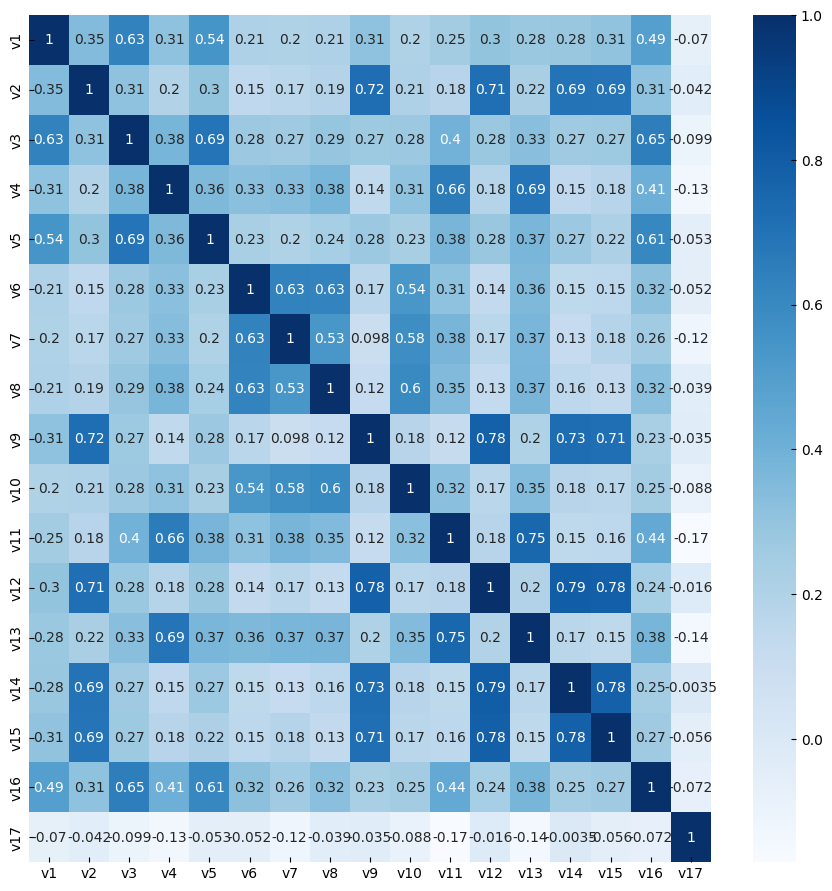

In [198]:
# Plot correlation matrix

plt.figure(figsize=(11,11))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

## Adequacy Test

In [199]:
#Bartlett’s Test
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value


(3858.6029131489045, 0.0)

In [200]:
# Kaiser-Meyer-Olkin (KMO) Test
kmo_all,kmo_model=calculate_kmo(df)

kmo_model

0.8816748331361525

In [201]:
#all KMO values above 0.7
pd.DataFrame(kmo_all)

,0
0,0.909687
1,0.936838
2,0.862464
3,0.903781
4,0.883910
5,0.834614
6,0.841010
7,0.873261
8,0.889173
9,0.890995


## Choosing the Number of Factors

In [202]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
# Check Eigenvalues
fa.fit(df)
eigen_values, vectors = fa.get_eigenvalues()

eigen_values

eigen = pd.DataFrame(eigen_values)

print(eigen)
print(type(eigen))

           0
0   6.086964
1   2.978745
2   1.711352
3   1.248060
4   0.958078
5   0.522736
6   0.499515
7   0.467600
8   0.406222
9   0.358539
10  0.333291
11  0.324602
12  0.279224
13  0.243501
14  0.208696
15  0.198936
16  0.173938
<class 'pandas.core.frame.DataFrame'>


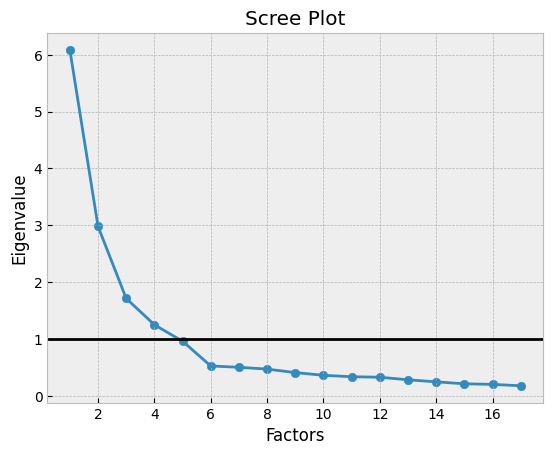

In [203]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),eigen.values)
plt.plot(range(1,df.shape[1]+1),eigen.values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1,c='k')

# Do factor analysis

In [204]:
fa = FactorAnalyzer(n_factors=4,rotation='varimax')
fa.fit(df)
factor_df=pd.DataFrame(fa.loadings_,index=df.columns , columns= ['Perception','Responsiveness ','Service','Security'])
print(factor_df)
loading=pd.DataFrame(fa.loadings_ , columns= ['Perception','Responsiveness ','Service','Security'])
print(loading)


     Perception  Responsiveness    Service  Security
v1     0.235614         0.636657  0.110623  0.132136
v2     0.775602         0.206373  0.100130  0.090985
v3     0.153819         0.837412  0.168706  0.185170
v4     0.082636         0.241148  0.227454  0.699575
v5     0.163392         0.735953  0.101884  0.228699
v6     0.069974         0.140945  0.766003  0.160572
v7     0.076109         0.095623  0.715925  0.224167
v8     0.059920         0.152496  0.723946  0.212024
v9     0.835910         0.147858  0.062989  0.051607
v10    0.114714         0.119850  0.689703  0.180912
v11    0.063634         0.222694  0.208960  0.802480
v12    0.888494         0.130924  0.062622  0.088243
v13    0.106375         0.163950  0.239259  0.824297
v14    0.855583         0.135667  0.080565  0.047263
v15    0.846989         0.127108  0.089182  0.060414
v16    0.148485         0.656820  0.193332  0.276488
v17   -0.010582        -0.043874 -0.048161 -0.163631
    Perception  Responsiveness    Service  Sec

In [205]:
df_var=pd.DataFrame(fa.get_factor_variance(),columns= ['Perception','Responsiveness ','Service','Security'])
df_var.index = ['Sum of squares', 'Proportion of variation', 'Cumulative variation']
df_var

,Perception,Responsiveness,Service,Security
Sum of squares,3.716802,2.398964,2.374876,2.198447
Proportion of variation,0.218635,0.141116,0.139699,0.129320
Cumulative variation,0.218635,0.359751,0.499450,0.628770


/var/folders/0t/4q2l76sj2v91nwcfqht0bwlw0000gn/T/ipykernel_37489/882069556.py:3: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.

/var/folders/0t/4q2l76sj2v91nwcfqht0bwlw0000gn/T/ipykernel_37489/882069556.py:4: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



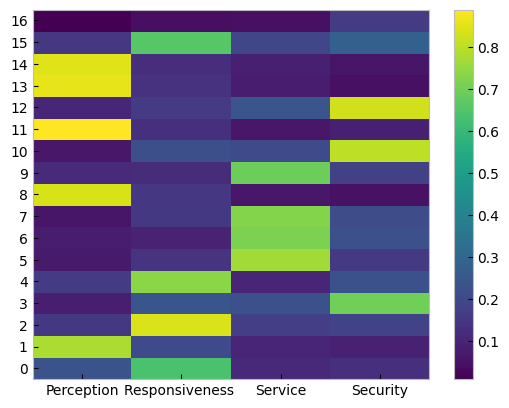

In [206]:
# heatmap of loadings
Z=np.abs(loading)
fig, ax = plt.subplots()
c = ax.pcolor(Z)
fig.colorbar(c, ax=ax)
ax.set_yticks(np.arange(loading.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(loading.shape[1])+0.5, minor=False)
ax.set_yticklabels(loading.index.values)
ax.set_xticklabels(loading.columns.values)
plt.show()

In [217]:
#transform to train regression
transformed_df=pd.DataFrame(fa.transform(df) , columns= ['Perception','Responsiveness ','Service','Security'])
transformed_df.insert(0,'Overall_satisfaction_score',df_orig.iloc[:, 1])
transformed_df.dropna()
transformed_df

,Overall_satisfaction_score,Perception,Responsiveness,Service,Security
0,4.0,1.560819,0.045545,-0.138199,-1.389927
1,5.0,-0.834655,-1.062765,1.770612,0.991108
2,7.0,0.874080,-0.604190,0.384962,-1.834801
3,4.0,1.981250,1.130476,-0.310614,0.237700
4,4.0,-0.476560,1.264593,0.126150,1.556736
...,...,...,...,...,...
377,5.0,-0.174768,-2.496448,0.299289,0.320729
378,4.0,-1.691100,0.159304,0.118167,0.657816
379,6.0,-1.332614,-2.387966,0.252659,1.089610
380,5.0,-0.991495,-1.753734,-1.193925,-1.093625


In [208]:
y = transformed_df['Overall_satisfaction_score'] # dependent variable
X = transformed_df[['Perception','Responsiveness ','Service','Security']] # independent variable

In [209]:
X = sm.add_constant(X) # adding a constant
lm = sm.OLS(y, X, missing='drop').fit() # fitting the model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Overall_satisfaction_score   R-squared:                       0.008
Model:                                    OLS   Adj. R-squared:                 -0.002
Method:                         Least Squares   F-statistic:                    0.7730
Date:                        Sat, 27 Aug 2022   Prob (F-statistic):              0.543
Time:                                17:50:38   Log-Likelihood:                -663.46
No. Observations:                         376   AIC:                             1337.
Df Residuals:                             371   BIC:                             1357.
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.2737      0.073     58.257      0.000       4.129       4.418
Perception         -0.0423      0.076     -0.559      0.576      -0.191       0.106
Responsiveness     -0.0738      0.080     -0.918      0.359      -0.232       0.084
Service            -0.1072      0.082     -1.306      0.192      -0.269       0.054
Security            0.0340      0.081      0.422      0.674      -0.125       0.193
==============================================================================
Omnibus:                        0.457   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.796   Jarque-Bera (JB):                0.505
Skew:                           0.083   Prob(JB):                        0.777
Kurtosis:                       2.930   Cond. No.                         1.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

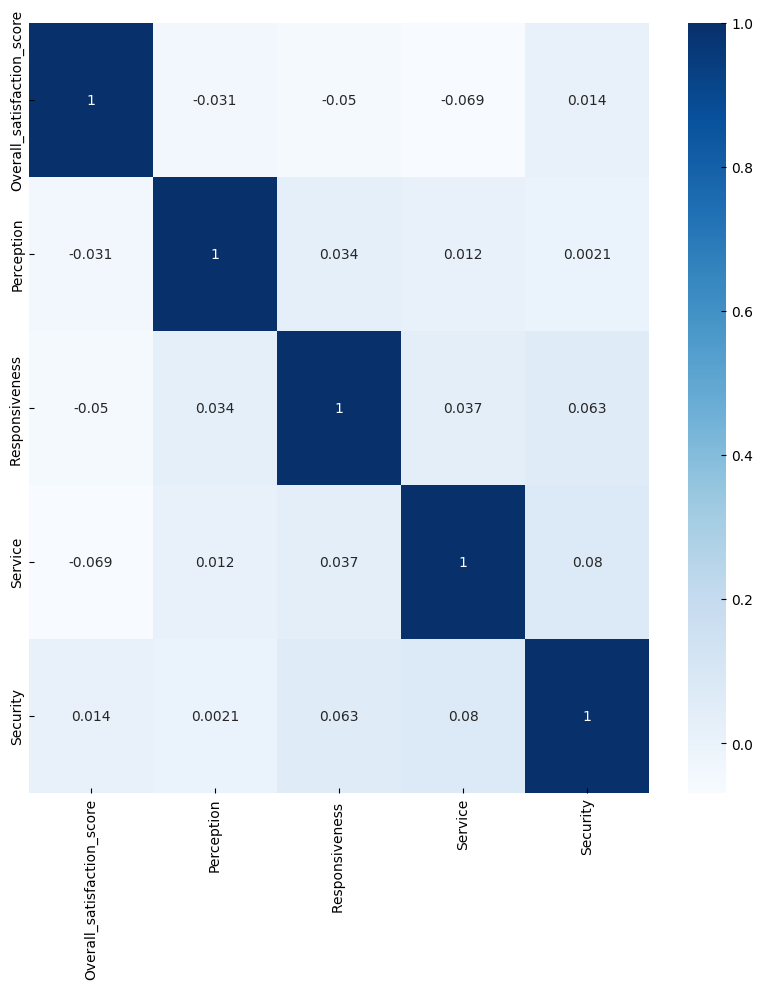

In [210]:

# chech for correlations
plt.figure(figsize=(10,10))
cor = transformed_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)

# Question 4

In [211]:
#import data
df4 = pd.read_excel("/Users/paul_reitz/Data/STC710/Question 4.xlsx")
df4.head()
df4.columns

Index(['Independent_variable', 'Mediator', 'Dependent_variable_1',
       'Dependent_variable_2'],
      dtype='object')

In [212]:
#look for nan values
df4.isna().sum()

Independent_variable    0
Mediator                0
Dependent_variable_1    0
Dependent_variable_2    0
dtype: int64

In [213]:
#info on data
df4.describe()

,Independent_variable,Mediator,Dependent_variable_1,Dependent_variable_2
count,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02
mean,1.379159e-16,1.682574e-16,3.640980e-16,3.585813e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.898840e+00,-1.338320e+00,-2.336833e+00,-1.806645e+00
25%,-6.702676e-01,-8.341607e-01,-6.585104e-01,-9.010282e-01
50%,7.153191e-03,-2.203642e-01,1.489922e-01,1.876663e-01
75%,8.281657e-01,8.722817e-01,8.165036e-01,1.076683e+00
max,1.533909e+00,1.876792e+00,1.244658e+00,1.115390e+00


In [221]:
#define simultaneuos equations
model_spec = """
  # measurement model
    Dependent_variable_1 =~ Independent_variable
    Dependent_variable_2 =~ Independent_variable
    Mediator =~ Independent_variable
  # regressions
    Dependent_variable_1 ~ Independent_variable + Mediator
    Dependent_variable_2 ~ Independent_variable + Mediator
"""
# Instantiate the model
model = semopy.Model(model_spec)
# Fit the model using the data
model.fit(df4)
# Show the results using the inspect method
model.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,Independent_variable,~,Dependent_variable_1,1.000000,-,-,-
1,Independent_variable,~,Dependent_variable_2,1.000000,-,-,-
2,Independent_variable,~,Mediator,1.000000,-,-,-
3,Dependent_variable_1,~,Independent_variable,0.051546,0.015204,3.390287,0.000698
4,Dependent_variable_1,~,Mediator,0.004195,0.001512,2.774753,0.005524
5,Dependent_variable_2,~,Independent_variable,0.051546,0.015204,3.390287,0.000698
6,Dependent_variable_2,~,Mediator,0.004195,0.001512,2.774753,0.005524
7,Independent_variable,~~,Independent_variable,0.534773,0.008523,62.743749,0.0
8,Dependent_variable_1,~~,Dependent_variable_1,0.087879,0.008523,10.310605,0.0
9,Dependent_variable_2,~~,Dependent_variable_2,0.087879,0.008523,10.310605,0.0


In [220]:


# step 1
y = df4['Dependent_variable_1'] # dependent variable
X = df4[['Independent_variable']] # independent variable
X = sm.add_constant(X) # adding a constant
lm = sm.OLS(y, X, missing='drop').fit() # fitting the model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Dependent_variable_1   R-squared:                       0.378
Model:                              OLS   Adj. R-squared:                  0.374
Method:                   Least Squares   F-statistic:                     96.54
Date:                  Sat, 27 Aug 2022   Prob (F-statistic):           4.22e-18
Time:                          18:11:38   Log-Likelihood:                -189.75
No. Observations:                   161   AIC:                             383.5
Df Residuals:                       159   BIC:                             389.7
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3.483e-16      0.062   5.58e-15      1.000      -0.123       0.123
Independent_variable     0.6147      0.063      9.826      0.000       0.491       0.738
==============================================================================
Omnibus:                       14.509   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.754
Skew:                          -0.689   Prob(JB):                     0.000379
Kurtosis:                       3.671   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [222]:
# step 1
y = df4['Dependent_variable_2'] # dependent variable

X = df4[['Independent_variable']] # independent variable
X = sm.add_constant(X) # adding a constant
lm = sm.OLS(y, X, missing='drop').fit() # fitting the model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Dependent_variable_2   R-squared:                       0.357
Model:                              OLS   Adj. R-squared:                  0.353
Method:                   Least Squares   F-statistic:                     88.43
Date:                  Sat, 27 Aug 2022   Prob (F-statistic):           5.64e-17
Time:                          18:13:57   Log-Likelihood:                -192.35
No. Observations:                   161   AIC:                             388.7
Df Residuals:                       159   BIC:                             394.9
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3.517e-16      0.063   5.55e-15      1.000      -0.125       0.125
Independent_variable    -0.5978      0.064     -9.404      0.000      -0.723      -0.472
==============================================================================
Omnibus:                        0.614   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.736   Jarque-Bera (JB):                0.591
Skew:                          -0.145   Prob(JB):                        0.744
Kurtosis:                       2.936   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [223]:
# step 2
y = df4['Mediator'] # dependent variable
X = df4[['Independent_variable']] # independent variable
X = sm.add_constant(X) # adding a constant
lm = sm.OLS(y, X, missing='drop').fit() # fitting the model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Mediator   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     116.3
Date:                Sat, 27 Aug 2022   Prob (F-statistic):           1.07e-20
Time:                        18:14:01   Log-Likelihood:                -183.75
No. Observations:                 161   AIC:                             371.5
Df Residuals:                     159   BIC:                             377.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.772e-16      0.060   2.95e-15      1.000      -0.119       0.119
Independent_variable     0.6500      0.060     10.785      0.000       0.531       0.769
==============================================================================
Omnibus:                        0.502   Durbin-Watson:                   2.135
Prob(Omnibus):                  0.778   Jarque-Bera (JB):                0.632
Skew:                          -0.007   Prob(JB):                        0.729
Kurtosis:                       2.693   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [224]:
# step 3
y = df4['Dependent_variable_1'] # dependent variable
X = df4[['Independent_variable','Mediator']] # independent variable
X = sm.add_constant(X) # adding a constant
lm = sm.OLS(y, X, missing='drop').fit() # fitting the model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Dependent_variable_1   R-squared:                       0.419
Model:                              OLS   Adj. R-squared:                  0.412
Method:                   Least Squares   F-statistic:                     57.08
Date:                  Sat, 27 Aug 2022   Prob (F-statistic):           2.20e-19
Time:                          18:21:24   Log-Likelihood:                -184.17
No. Observations:                   161   AIC:                             374.3
Df Residuals:                       158   BIC:                             383.6
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3.483e-16      0.060   5.76e-15      1.000      -0.119       0.119
Independent_variable     0.4400      0.080      5.517      0.000       0.283       0.598
Mediator                 0.2686      0.080      3.368      0.001       0.111       0.426
==============================================================================
Omnibus:                       10.945   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.256
Skew:                          -0.576   Prob(JB):                      0.00360
Kurtosis:                       3.593   Cond. No.                         2.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [225]:
# step 3
y = df4['Dependent_variable_2'] # dependent variable
X = df4[['Independent_variable','Mediator']] # independent variable
X = sm.add_constant(X) # adding a constant
lm = sm.OLS(y, X, missing='drop').fit() # fitting the model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Dependent_variable_2   R-squared:                       0.359
Model:                              OLS   Adj. R-squared:                  0.351
Method:                   Least Squares   F-statistic:                     44.20
Date:                  Sat, 27 Aug 2022   Prob (F-statistic):           5.67e-16
Time:                          18:22:03   Log-Likelihood:                -192.18
No. Observations:                   161   AIC:                             390.4
Df Residuals:                       158   BIC:                             399.6
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3.517e-16      0.064   5.54e-15      1.000      -0.125       0.125
Independent_variable    -0.5660      0.084     -6.752      0.000      -0.732      -0.400
Mediator                -0.0490      0.084     -0.584      0.560      -0.215       0.117
==============================================================================
Omnibus:                        0.626   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.731   Jarque-Bera (JB):                0.646
Skew:                          -0.147   Prob(JB):                        0.724
Kurtosis:                       2.902   Cond. No.                         2.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [215]:
import numpy as np

# mediation modeling
np.seterr(divide='ignore', invalid='ignore')
probit = links.probit
outcome_model1 = sm.GLM.from_formula("Dependent_variable_1 ~ Independent_variable + Mediator",
                                    df4, family=sm.families.Binomial(link=probit()))

mediator_model = sm.OLS.from_formula("Mediator ~ Independent_variable", df4)
med = statsmodels.stats.mediation.Mediation(outcome_model1, mediator_model, "Independent_variable", "Mediator").fit()

med.summary()

,Estimate,Lower CI bound,Upper CI bound,P-value
ACME (control),0.004919,-0.006211,0.018634,0.052
ACME (treated),0.328857,0.211180,0.434938,0.000
ADE (control),0.339242,0.254658,0.434783,0.000
ADE (treated),0.663180,0.559006,0.763975,0.000
Total effect,0.668099,0.565217,0.770186,0.000
Prop. mediated (control),0.008403,-0.008549,0.028302,0.052
Prop. mediated (treated),0.493336,0.351620,0.614086,0.000
ACME (average),0.166888,0.108696,0.223602,0.000
ADE (average),0.501211,0.422360,0.577640,0.000
Prop. mediated (average),0.250000,0.175914,0.313133,0.000


In [216]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

probit = links.probit
outcome_model2 = sm.GLM.from_formula("Dependent_variable_2 ~ Independent_variable + Mediator",
                                    df4, family=sm.families.Binomial(link=probit()))

mediator_model = sm.OLS.from_formula("Mediator ~ Independent_variable", df4)
med = statsmodels.stats.mediation.Mediation(outcome_model2, mediator_model, "Independent_variable", "Mediator").fit()

med.summary()

,Estimate,Lower CI bound,Upper CI bound,P-value
ACME (control),0.0,0.0,0.0,0.0
ACME (treated),0.0,0.0,0.0,0.0
ADE (control),0.0,0.0,0.0,0.0
ADE (treated),0.0,0.0,0.0,0.0
Total effect,0.0,0.0,0.0,0.0
Prop. mediated (control),NaN,NaN,NaN,0.0
Prop. mediated (treated),NaN,NaN,NaN,0.0
ACME (average),0.0,0.0,0.0,0.0
ADE (average),0.0,0.0,0.0,0.0
Prop. mediated (average),NaN,NaN,NaN,0.0
